    Issues
    
    Diffusion model does not return potentially NSFW images. BUT these images are actually 
    https://github.com/CompVis/stable-diffusion/issues/239

In [14]:
from diffusers import StableDiffusionPipeline
import torch
import json
import os
import shutil

In [8]:
# !pip install diffusers
# !pip install accelerate #accelerate-0.24.1

In [2]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [31]:
pipe.safety_checker = None
pipe.requires_safety_checker = False

### Test text to image example

  0%|          | 0/50 [00:00<?, ?it/s]

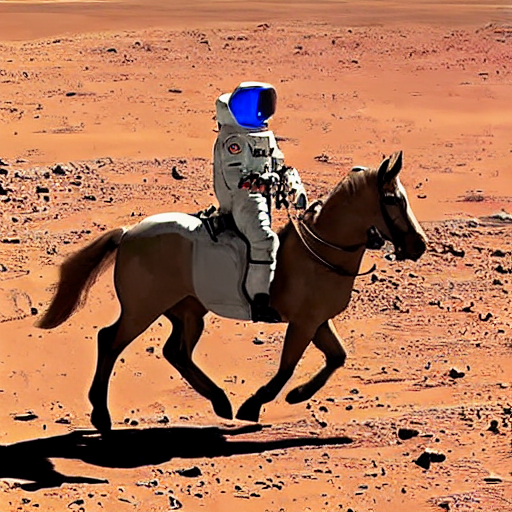

In [3]:
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]  
image

## Create a set of images for short stories and store them

In [7]:
f = open('../childrenBook/chatGPTOutput.txt', 'r')
data = json.load(f)

In [9]:
data['0']

{'0': {'org': 'every year, the evil protectorate offers a baby to the evil witch in the forest to ensure their village’s safety',
  'img_prompt': 'Basket with a newborn baby inside.. in oil painting style'},
 '1': {'org': 'so xan decides to raise luna as her own',
  'img_prompt': 'A young girl with a magical aura.. in oil painting style'},
 '2': {'org': 'the writing flows beautifully and barnhill’s keen observation of human nature fits naturally into the story, which moves along at a satisfying pace',
  'img_prompt': 'Pen with flowing ink and smooth handwriting.. in oil painting style'},
 '3': {'org': 'xan is a delightfully pleasant and caring crone witch who dispels the traditional image of cackling evildoer, and replaces it with something far more loving and magical',
  'img_prompt': 'A kind old woman with a loving smile.. in oil painting style'},
 '4': {'org': 'perfect for young fans of neil gaiman, ursula le guin and diana wynne jones',
  'img_prompt': 'Bookshelf filled with fantas

In [34]:
for k in data['0']:
    

{'0': {'org': 'every year, the evil protectorate offers a baby to the evil witch in the forest to ensure their village’s safety',
  'img_prompt': 'Basket with a newborn baby inside.. in oil painting style'},
 '1': {'org': 'so xan decides to raise luna as her own',
  'img_prompt': 'A young girl with a magical aura.. in oil painting style'},
 '2': {'org': 'the writing flows beautifully and barnhill’s keen observation of human nature fits naturally into the story, which moves along at a satisfying pace',
  'img_prompt': 'Pen with flowing ink and smooth handwriting.. in oil painting style'},
 '3': {'org': 'xan is a delightfully pleasant and caring crone witch who dispels the traditional image of cackling evildoer, and replaces it with something far more loving and magical',
  'img_prompt': 'A kind old woman with a loving smile.. in oil painting style'},
 '4': {'org': 'perfect for young fans of neil gaiman, ursula le guin and diana wynne jones',
  'img_prompt': 'Bookshelf filled with fantas

In [15]:
if os.path.exists("../datasets/childrenBook/images/"):
    shutil.rmtree("../datasets/childrenBook/images/")    
os.makedirs("../datasets/childrenBook/images/")

if os.path.exists("../datasets/childrenBook/labels/"):
    shutil.rmtree("../datasets/childrenBook/labels/")    
os.makedirs("../datasets/childrenBook/labels/")

In [35]:
for story in data:
    s_name = "story_"+story

    print(f"Processing {s_name}...")
    if os.path.exists(f"../datasets/childrenBook/images/{s_name}"):
        shutil.rmtree(f"../datasets/childrenBook/images/{s_name}")
    os.makedirs(f"../datasets/childrenBook/images/{s_name}")

    if os.path.exists(f"../datasets/childrenBook/labels/{s_name}"):
        shutil.rmtree(f"../datasets/childrenBook/labels/{s_name}")
    os.makedirs(f"../datasets/childrenBook/labels/{s_name}")
    
    for sent in data[story]:
        # generate images and save
        img_prompt = data[story][sent]['img_prompt']
        print(f"Generating for: {img_prompt}")
        img = pipe(img_prompt).images[0]
        img.save(f'../datasets/childrenBook/images/{s_name}/{sent}.jpg')
        
        # save label
        with open(f'../datasets/childrenBook/labels/{s_name}/{sent}.txt',"w") as f:
            f.write(data[story][sent]['org'])
            f.close()

Processing story_0...
Generating for: Basket with a newborn baby inside.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A young girl with a magical aura.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Pen with flowing ink and smooth handwriting.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A kind old woman with a loving smile.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Bookshelf filled with fantasy novels.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_1...
Generating for: School journal with Anna's confused notes on Bennett's behavior. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A shared sketchbook filled with their favorite artwork and scribbles. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A necklace with a hidden locket, containing an ancient symbol. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A torn and aged birth certificate revealing their age difference. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A worn-out copy of the book "The Time Traveller's Wife" with dog-eared pages. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_2...
Generating for: A stopwatch. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A basketball. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A megaphone. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A comedy club ticket. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A diary. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_3...
Generating for: Flashlight. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Train ticket. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Protest banner. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Photograph. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Newspaper article. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_4...
Generating for: Conducting baton or conducting stick. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Violin and piano. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Sheet music or musical score. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Musical instrument or orchestra. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Book or written introduction. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_5...
Generating for: Settlement. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Blue star. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Frozen landscape. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Sequel. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Reader. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_6...
Generating for: Broken globe. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Crumpled school photo. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Group's backpacks filled with supplies. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Tattered map. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Opened book with a playful zombie illustration. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_7...
Generating for: Broken kite. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Suitcase. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Mysterious key. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Torn photograph. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Feather. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_8...
Generating for: A novel by the author of the much-loved one hundred and one dalmatians. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A former bestselling novelist suffering from writer's block. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Limited money and Cassandra and her discontented older sister Rose. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Young, wealthy American neighbors and an opportunity for escape. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Cassandra as a likable heroine encountering first love and heartbreak. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_9...
Generating for: A dull, scratched music CD case.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A menacing notebook filled with intricate drawings.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A vibrant, blooming flower emerging from cracked pavement.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A calendar with a circled date of December 31st.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A broken smartphone with mean messages displayed on screen.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_10...
Generating for: Young woman's body washed up on the shore of a lake. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Memories of own near-death experience and heartbreak. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: People and things not always what they seem. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Determination to prove someone close is a murderer. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Engaging, complex thriller with lies, secrets, deceit, jealousy. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_11...
Generating for: A family photo album filled with happy memories and Liam's pictures.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A handwritten letter from Tyler expressing his condolences and friendship.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A tangled web of ropes symbolizing the uncontrollable situation.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A compass representing Amber's search for strength and resolution.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A well-worn diary filled with Amber's innermost thoughts and struggles.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_12...
Generating for: Postcard of a small sea-side town in England. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Compass and stamp book for letterboxing game. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Picture of a mysterious and beautiful girl named Eli. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Magnifying glass with a suspicious note hidden underneath. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Clock ticking towards midnight. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_13...
Generating for: Castle portrait. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Executioner's axe. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Smiling guard's sword. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Queen's secret scroll. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Intricate plot map. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_14...
Generating for: Tragedy book cover with a crown and three daughters.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Book cover with a Native American on fire wheel.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Manga Shakespeare graphic novel with colorful illustrations.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Shakespeare introduction book for key stage 3 students.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Book with intense illustrations depicting a tragic classic play.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_15...
Generating for: A torn backpack with scattered papers and broken pencils.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A small notebook filled with doodles and poems.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A clock ticking away with missed lunch period.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A watercolor painting of a mysterious forest.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A gold-plated medal with a green ribbon.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_16...
Generating for: Crumpled map covered in red circles and scribbled notes.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Road sign with arrows pointing in different directions.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A cozy quilt with patches of different colors and patterns.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Photo album filled with pictures and handwritten memories.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Dog-eared novel with a worn-out bookmark.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_17...
Generating for: Locked door representing fear and isolation in England.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Cracked stone wall causing horror over normal machines in Britain.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Abandoned cars on roads symbolizing a return to farming and old-fashioned life.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Split families and grown-ups forgetting past, presenting challenges for young people.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Teen sci-fi novel, a classic in the genre.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_18...
Generating for: Enchanted train. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Impossible Postal Express. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: The Union. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Newest postie. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Jumping instead of thinking. in watercolor style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_19...
Generating for: A beautifully crafted poem with vivid imagery.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A torn and weathered high school yearbook.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A magnifying glass illuminating a blurred face.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A brightly colored motivational poster.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A mirror reflecting a diverse group of teenagers.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_20...
Generating for: Test tube filled with bubbling green liquid.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Abandoned, patchwork doll with sad, stitched-up eyes.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Shadowy silhouette with twisted limbs and fangs.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Colorful pop-up book with intricate illustrations and moving parts.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Pages unfolding to reveal a lightning-filled laboratory and a burning windmill.. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_21...
Generating for: Comic strip book with Calvin and Hobbes illustrations.. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Small toy action figure of Calvin.. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Colorful and intricate comic strip artwork.. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Set of figurines representing the supporting characters.. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Oversized teacher figurine standing next to Calvin.. in pop art style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_22...
Generating for: Self-help book on dealing with bullying.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A tear-stained diary with marked calendar pages.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A deflated football lying abandoned on the field.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A collage featuring different forms of bullying behavior.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A jar filled with various colored stones, each representing a person's experience with bullying.. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_23...
Generating for: Forged vehicle documents. in 3D rendering style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A girl who resembles his sister. in 3D rendering style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Exclusion or avoiding involvement. in 3D rendering style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A journey towards novelty. in 3D rendering style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Characters and varied landscapes. in 3D rendering style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_24...
Generating for: letter. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: book. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: cover. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: book. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: meaning. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_25...
Generating for: Diary. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Cluttered house. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Rubbish-filled bathtub. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Lonely girl. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Warning label. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_26...
Generating for: A time machine. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A hidden blueprint. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Puppet strings. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A hidden photograph. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A map with multiple timelines. in surrealism style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_27...
Generating for: Suitcase. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Knife. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Newspaper clipping. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Map. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Detective badge. in graffiti style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_28...
Generating for: A framed portrait of two young girls holding hands.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A worn, leather-bound book filled with secret notes.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A miniature magnifying glass with a concealed compartment.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A historically accurate map depicting Scotland and France.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A locket with two intertwined hearts, one silver and one gold.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_29...
Generating for: Intricately designed cover with vibrant illustrations and intricate details.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A beautifully illustrated dual storyline, merging seamlessly with each other.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A closed-mouthed character peeking out from behind a computer screen.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A tangled web of interconnected storylines on pages.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A magnifying glass revealing hidden symbols and patterns on pages.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_30...
Generating for: Proclamation signed by Abraham Lincoln. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Piece of cake with a heavenly decoration. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Spicy pepper that tastes like hellfire. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Distorted portrait of a loving mother. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Burning matchstick in a dark cellar. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_31...
Generating for: Ruined, isolated palace of Woodstock. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: - A dilapidated castle surrounded by thick stone walls.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: . in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Meg is no ordinary girl. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: - A young girl with a mischievous grin and a spark in her eyes.. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_32...
Generating for: A letter of acceptance to Mademoiselle Geraldine's finishing academy.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A hidden compartment in a fancy dress revealing secret weapons.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: An airship with werewolves and vampires supervising the students.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A mechanical butler serving tea to the young ladies.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A steam-powered sausage dog named Bumbersnoot tagging along.. in oil painting style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_33...
Generating for: Photo frame with a picture of Lennie and her sister.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Empty shadow silhouette against a vibrant background.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A crumpled paper with a heartfelt poem written on it.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A book with textured pages and handwritten poems inserted.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: A colorful book cover with artistic illustrations and handwritten font.. in futuristic style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_34...
Generating for: Mirror reflection. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Locked door. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Conflicted expression. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Sword. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Generating for: Book cover. in black and white photo style


  0%|          | 0/50 [00:00<?, ?it/s]

Processing story_35...
